# IMDB Movie Review Classification

### Import Dataset

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = [(value, key) for key, value in word_index.items()]
reverse_word_index_dict = dict(reverse_word_index)
decoded_review = ' '.join([reverse_word_index_dict.get(i - 3, '?') for i in train_data[0]])

In [16]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Preprocess Data

In [5]:
import numpy as np

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train[0]

1.0

### Build the Model

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Train the Model

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 139us/sample - loss: 0.5125 - accuracy: 0.7897 - val_loss: 0.4018 - val_accuracy: 0.8610
Epoch 2/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.3135 - accuracy: 0.9012 - val_loss: 0.3090 - val_accuracy: 0.8864
Epoch 3/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.2282 - accuracy: 0.9278 - val_loss: 0.2841 - val_accuracy: 0.8871
Epoch 4/20
15000/15000 [==============================] - 1s 61us/sample - loss: 0.1815 - accuracy: 0.9404 - val_loss: 0.2726 - val_accuracy: 0.8908
Epoch 5/20
15000/15000 [==============================] - 1s 62us/sample - loss: 0.1460 - accuracy: 0.9533 - val_loss: 0.2817 - val_accuracy: 0.8887
Epoch 6/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.1208 - accuracy: 0.9621 - val_loss: 0.2899 - val_accuracy: 0.8849
Epoch 7/20
15000/15000 [==============================]

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

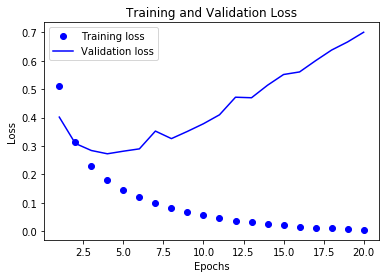

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

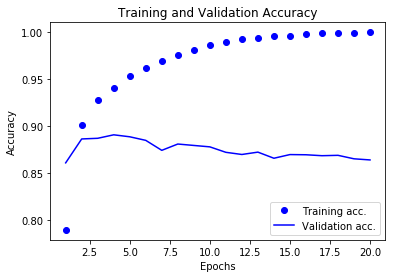

In [30]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc.')
plt.plot(epochs, val_acc, 'b', label='Validation acc.')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Test the Model

In [31]:
results = model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [33]:
model.predict(x_test)

array([[0.00878137],
       [1.        ],
       [0.9946409 ],
       ...,
       [0.00297213],
       [0.02022552],
       [0.9511603 ]], dtype=float32)

### Experiments

In [34]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 99us/sample - loss: 0.5078 - accuracy: 0.8041 - val_loss: 0.3948 - val_accuracy: 0.8740
Epoch 2/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.3087 - accuracy: 0.9055 - val_loss: 0.3103 - val_accuracy: 0.8819
Epoch 3/40
15000/15000 [==============================] - 1s 66us/sample - loss: 0.2251 - accuracy: 0.9285 - val_loss: 0.2856 - val_accuracy: 0.8856
Epoch 4/40
15000/15000 [==============================] - 1s 65us/sample - loss: 0.1791 - accuracy: 0.9427 - val_loss: 0.2778 - val_accuracy: 0.8869
Epoch 5/40
15000/15000 [==============================] - 1s 66us/sample - loss: 0.1488 - accuracy: 0.9519 - val_loss: 0.2780 - val_accuracy: 0.8874
Epoch 6/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.1242 - accuracy: 0.9621 - val_loss: 0.2887 - val_accuracy: 0.8850
Epoch 7/40
15000/15000 [==============================] 

In [37]:
def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Epochs vs. Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

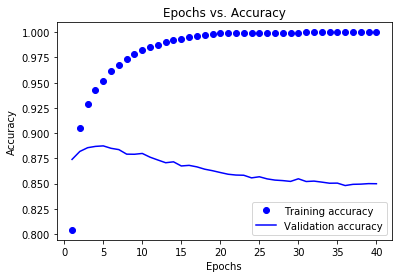

In [38]:
plot_accuracy(history)

In [40]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 1,288,449
Trainable params: 1,288,449
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 101us/sample - loss: 0.4107 - accuracy: 0.8154 - val_loss: 0.4090 - val_accuracy: 0.8250
Epoch 2/40
15000/15000 [==============================] - 1s 66us/sample - loss: 0.2116 - accuracy: 0.9195 - val_loss: 0.3992 - val_accuracy: 0.8387
Epoch 3/40
15000/15000 [==============================] - 1s 65us/sample - loss: 0.1421 - accuracy: 0.9489 - val_loss: 0.3181 - val_accuracy: 0.8840
Epoch 4/40
15000/15000 [==============================] - 1s 66us/sample - loss: 0.0933 - accuracy: 0.9665 - val_loss: 0.3429 - val_accuracy: 0.8803
Epoch 5/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.4071 - val_accuracy: 0.8806
Epoch 6/40
15000/15000 [==============================] - 1s 67us/sample - loss: 0.0301 - accuracy: 0.9918 - val_loss: 0.4913 - val_accuracy: 0.8823
Epoch 7/40
15000/15000 [==============================]

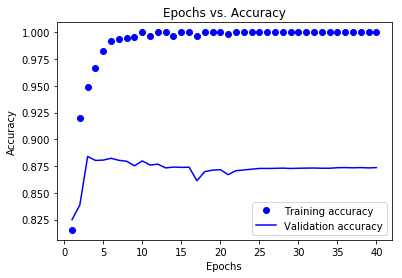

In [44]:
plot_accuracy(history)

In [45]:
model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.1299689815781613, 0.85824]

In [46]:
model.compile(optimizer='rmsprop',
             loss='MSE',
             metrics=['accuracy'])

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 87us/sample - loss: 8.2458e-16 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.8736
Epoch 2/40
15000/15000 [==============================] - 1s 64us/sample - loss: 8.2429e-16 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.8736
Epoch 3/40
15000/15000 [==============================] - 1s 65us/sample - loss: 8.2595e-16 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.8736
Epoch 4/40
15000/15000 [==============================] - 1s 64us/sample - loss: 8.2903e-16 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.8736
Epoch 5/40
15000/15000 [==============================] - 1s 63us/sample - loss: 8.2701e-16 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.8736
Epoch 6/40
15000/15000 [==============================] - 1s 63us/sample - loss: 8.2820e-16 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.8736
Epoch 7/40
15000/15000 [========

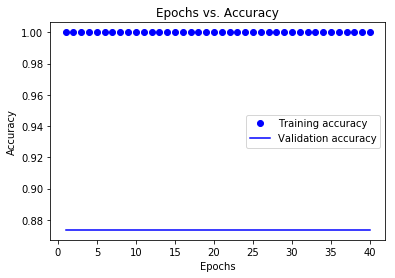

In [48]:
plot_accuracy(history)

In [49]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [51]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 98us/sample - loss: 0.4116 - accuracy: 0.8348 - val_loss: 0.3406 - val_accuracy: 0.8569
Epoch 2/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.2134 - accuracy: 0.9197 - val_loss: 0.2723 - val_accuracy: 0.8905
Epoch 3/40
15000/15000 [==============================] - 1s 62us/sample - loss: 0.1489 - accuracy: 0.9451 - val_loss: 0.2947 - val_accuracy: 0.8844
Epoch 4/40
15000/15000 [==============================] - 1s 63us/sample - loss: 0.1118 - accuracy: 0.9599 - val_loss: 0.3328 - val_accuracy: 0.8815
Epoch 5/40
15000/15000 [==============================] - 1s 63us/sample - loss: 0.0840 - accuracy: 0.9722 - val_loss: 0.4587 - val_accuracy: 0.8569
Epoch 6/40
15000/15000 [==============================] - 1s 62us/sample - loss: 0.0625 - accuracy: 0.9779 - val_loss: 0.4492 - val_accuracy: 0.8729
Epoch 7/40
15000/15000 [==============================] 

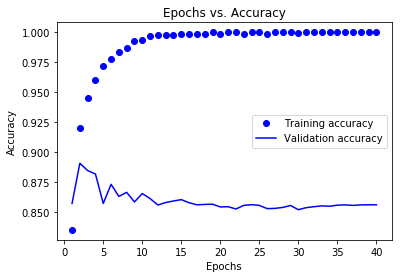

In [52]:
plot_accuracy(history)